# Numerical Methods for Solving $y' = f(t,y)$ with $y(t_0) = y_0$

---
> Math 2340 - Differential Equations

> Last Update: *February 25, 2021 by Katie Oliveras*

---


## Overview
This file compares various methods for solving the initial value problem $$y' = f(t,y), \qquad y(t_0) = y_0$$ numerically. In this file, we will explore 3 different numerical methods:
1. Euler's Method
2. Improved Euler's Method (or Huen's Method)
3. 4-th Order Runge-Kutta Method



## Preliminaries<a class="anchor" id="preliminaries"></a>
Here, we import the necessary libraries.  The code `from numpy import *` imports all of the necessary modules from the NumPy library.  

**Note** If you ever need to calculate $t^n$ in Python, simply type `t**n`

In [ ]:
from numpy import *
from matplotlib import pyplot as plt

For all of our numerical methods to solve $y' = f(t,y)$ with $y(t_0) = y_0$, there are several ingredients that we need.

1. The initial conditions $t_0$ and $y_0$ 
2. The final time when we would like to compute the solution $t_f$ 
3. The number of steps we would like to take \(N\) thus defining $\Delta t$ 
4. The $f(t,y)$ corresponding to the differential equation we would like to solve.

The following code block defines all of these items. For this example, we will consider solving the differential equation

$$y' = -y + t,\quad y(0) = 1$$

Notice that for this problem, we have

$$t_0 = 0, \quad y_0 = 1,\quad f(t,y) = -y+t$$

If we want to solve up to time $t_f = 5$ taking 50 time steps, then

$$t_f = 5, ~~N = 50, ~~\Delta t = \frac{t_f - t_0}{N} = \frac{1}{10} = 0.1$$

In [ ]:
t0=0;                          # The initial time
y0=1;                          # The initial condition
tf=5;                          # The final time 
N=10;                          # The number of steps 
dt=(tf-t0)/N;                  # The time interval dt
t=linspace(t0,tf,N+1)          # Preallocating the vector of t values

def f(t,y):                    # Defining f(t,y)
    return -y+t

In the future, we would like to be able to compare our approximate solutions with the true solutions in order to compute the error.  

In this case, we can actually determine the true solution to the initial value problem $$y' = -y + t, \qquad y(0) = 1.$$  The solution is $$\boxed{y(t) = 2e^{-t} + t - 1}$$  In the cells below, we will define the true solution over the same set of $t$ values used to numerically compute the solution.  We will also evaluate it over a finer grid in order to see the "smooth" curve.  

In [ ]:
yTrue = 2*exp(-t) + t - 1;                     # True sol on same grid as approximation
tFine = linspace(t0,tf,10*N);                  # Fine grid for detailed plotting
yTrueFine = 2*exp(-tFine) + tFine - 1;         # True solution on the fine grid

##The Numerical Methods<a class="anchor" id="`NumericalMethods`"></a>

###Euler's Method<a class="anchor" id="Euler"></a>
*Recall* per our discussion in class, **Euler's Method** approximates the solution at $y_n$ if we know the value of $y_{n-1}$ via the following:
* $k_1 = \Delta t\cdot f(t_{n-1},y_{n-1})$
* $y_n = y_{n - 1} + k_1$

In the code block below, we initialize a vector of zeros for $y$ at different instances using the `zeros` command from the NumPy library.  Then, we will replace the initial values using the initial condition $y_0$ and loop to calculate $y_1$, $y_2$, and so on.

In [ ]:
yEuler=zeros([N+1])                                       # Initialize the vector for Euler's method

yEuler[0]=y0;                                             # Set the initial value to be y_0

for n in range(1,N+1):                                    # Loop from n = 1 to n = N+1
    k1 = dt*f(t[n-1],yEuler[n-1]);                        # define k1
    yEuler[n] = yEuler[n-1] + k1;                         # update the solution

yEulerError = abs(yTrue - yEuler);                        # compute the error between the true solution and what is generated via Euler's Method
print("  t_n        y_n        error_n    ")              # printing the error
print("-----------------------------------")              # -------------------
print(hstack([t.reshape(N+1,1),                           # reshape and print the data (t_n vs y(t_n) vs error(t_n))
              yEuler.reshape(N+1,1),
              yEulerError.reshape(N+1,1)
              ]))


  t_n        y_n        error_n    
-----------------------------------
[[0.         1.         0.        ]
 [0.5        0.5        0.21306132]
 [1.         0.5        0.23575888]
 [1.5        0.75       0.19626032]
 [2.         1.125      0.14567057]
 [2.5        1.5625     0.10167   ]
 [3.         2.03125    0.06832414]
 [3.5        2.515625   0.04476977]
 [4.         3.0078125  0.02881878]
 [4.5        3.50390625 0.01831174]
 [5.         4.00195312 0.01152277]]


###Improved Euler's Method <a class="anchor" id="ImpEuler"></a>
Recall per our discussion in class, **Improved Euler's Method** approximates the solution at $y_n$ if we know the value of $y_{n-1}$ via the following:
* $k_1 = \Delta t\cdot f(t_{n-1},y_{n-1})$

* $k_2 = \Delta t\cdot f(t_{n},y_{n-1} + k_1)$

* $\displaystyle y_n = y_{n - 1} + \frac{1}{2}(k_1 + k_2)$

In the code block below, we initialize a vector of zeros for $y$ at different instances using the `zeros` command from the NumPy library.  Then, we will replace the initial values using the initial condition $y_0$ and loop to calculate $y_1$, $y_2$, and so on.

In [ ]:
yImpEuler=zeros([N+1])                                        # Initialize the vector for Improved Euler's method

yImpEuler[0]=y0;                                              # Set the initial value to be y_0

for n in range(1,N+1):                                        # Loop from n = 1 to n = N+1
    k1=dt*f(t[n-1],yImpEuler[n-1]);
    k2=dt*f(t[n],yImpEuler[n-1]+k1)
    yImpEuler[n]=yImpEuler[n-1] + 1/2*(k1 + k2);

yImpEulerError = abs(yTrue - yImpEuler);                      # compute the error between the true solution and what is generated via Euler's Method
print("  t_n            y_n            error_n    ")
print("-------------------------------------------")
print(hstack([t.reshape(N+1,1),                               # reshape and print the data (t_n vs y(t_n) vs error(t_n))
              yImpEuler.reshape(N+1,1),
              yImpEulerError.reshape(N+1,1)
              ]))


  t_n            y_n            error_n    
-------------------------------------------
[[0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.00000000e-01 7.50000000e-01 3.69386806e-02]
 [1.00000000e+00 7.81250000e-01 4.54911177e-02]
 [1.50000000e+00 9.88281250e-01 4.20209297e-02]
 [2.00000000e+00 1.30517578e+00 3.45052148e-02]
 [2.50000000e+00 1.69073486e+00 2.65648660e-02]
 [3.00000000e+00 2.11920929e+00 1.96351528e-02]
 [3.50000000e+00 2.57450581e+00 1.41110391e-02]
 [4.00000000e+00 3.04656613e+00 9.93485095e-03]
 [4.50000000e+00 3.52910383e+00 6.88583738e-03]
 [5.00000000e+00 4.01818989e+00 4.71400004e-03]]


###Runge-Kutta (4th Order) Method<a class="anchor" id="RK4"></a>
While we did not derive this particular method in class, the 4th order Runge-Kutta Numerical Method approximates the solution at $y_n$ if we know $y_{n-1}$ via the following: 
* $\displaystyle k_1 = \Delta t\cdot f(t_{n-1},y_{n-1})$

* $\displaystyle k_2 = \Delta t\cdot f(t_{n-1/2},y_{n-1} + k_1)$

* $\displaystyle k_3 = \Delta t\cdot f(t_{n-1/2},y_{n-1} + \frac{k_2}{2})$

* $\displaystyle k_4 = \Delta t\cdot f(t_{n},y_{n-1} + k_3)$

* $\displaystyle y_n = y_{n -1} + \frac{1}{6}\bigg(k_1 + 2k_2 + 2k_3 + k_4\bigg)$

where $\displaystyle t_{n - 1/2} = t_{n -1} + \frac{\Delta t}{2}$.


In [ ]:
yRK4 = zeros([N+1])                                         # Initialize the vector for RK4 method

yRK4[0]=y0;                                                 # Set the initial value to be y_0

for n in range(1,N+1):                                      # Loop from n = 1 to n = N+1
    k1 = dt*f(t[n-1],yRK4[n-1]);
    k2 = dt*f(t[n-1] + dt/2, yRK4[n-1] + k1/2);
    k3 = dt*f(t[n-1] + dt/2, yRK4[n-1] + k2/2);
    k4 = dt*f(t[n], yRK4[n-1] + k3);
    yRK4[n] = yRK4[n-1] + 1/6*(k1 + 2*k2 + 2*k3 + k4);

yRK4Error = abs(yTrue - yRK4);                              # compute the error between the true solution and what is generated via Euler's Method
print("  t_n            y_n            error_n    ")
print("-------------------------------------------")
print(hstack([t.reshape(N+1,1),                             # reshape and print the data (t_n vs y(t_n) vs error(t_n))
              yRK4.reshape(N+1,1),
              yRK4Error.reshape(N+1,1)
              ]))


  t_n            y_n            error_n    
-------------------------------------------
[[0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.00000000e-01 7.13541667e-01 4.80347241e-04]
 [1.00000000e+00 7.36341688e-01 5.82806025e-04]
 [1.50000000e+00 9.46790660e-01 5.30339572e-04]
 [2.00000000e+00 1.27109954e+00 4.28974541e-04]
 [2.50000000e+00 1.66449529e+00 3.25297170e-04]
 [3.00000000e+00 2.09981095e+00 2.36810137e-04]
 [3.50000000e+00 2.56056237e+00 1.67604565e-04]
 [4.00000000e+00 3.03674748e+00 1.16202792e-04]
 [4.50000000e+00 3.52229730e+00 7.93063313e-05]
 [5.00000000e+00 4.01352935e+00 5.34569446e-05]]


##Comparing the Methods<a class="anchor" id="compare"></a>

### Plotting the Solutions<a class="anchor" id="plot"></a>

In the code block below, we will plot the solutions computed using 
1. Euler's Method
2. Improved Euler's Method
3. Runge-Kutta 4th Order Method

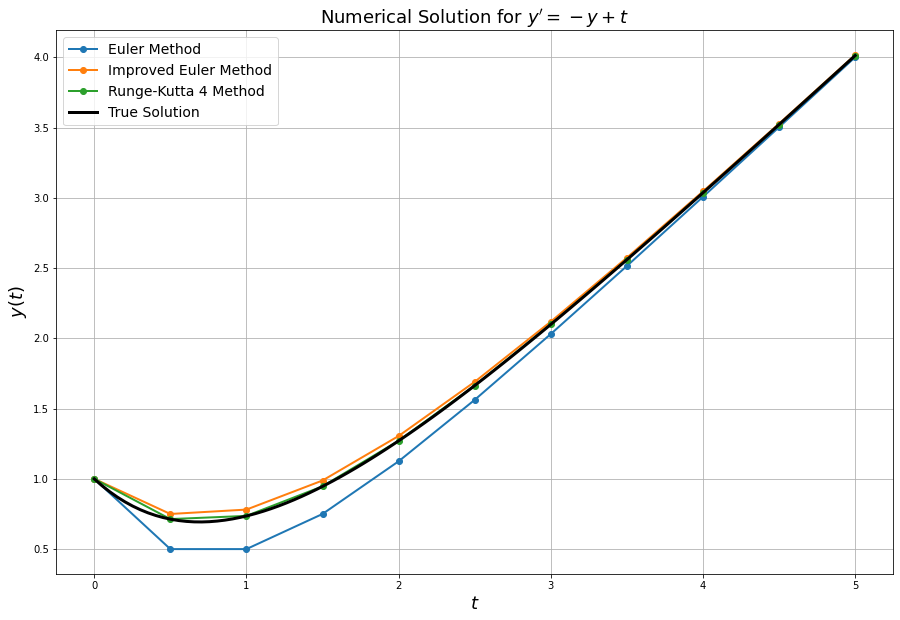

In [ ]:
# Plot the Solutions
plt.figure(figsize=(15,10));
plt.plot(t, yEuler, '.-', linewidth = 2, markersize = 12, label = 'Euler Method');
plt.plot(t, yImpEuler, '.-', linewidth = 2, markersize = 12, label = 'Improved Euler Method');
plt.plot(t, yRK4, '.-', linewidth = 2, markersize = 12, label = 'Runge-Kutta 4 Method');
plt.plot(tFine, yTrueFine, 'k', linewidth = 3, markersize = 12, label = 'True Solution');

# Label Things
plt.xlabel('$t$', fontsize = 18);
plt.ylabel('$y(t)$', fontsize = 18);
plt.title('Numerical Solution for $y^\prime = -y + t$', fontsize = 18);
plt.legend(fontsize = 14);
plt.grid()
plt.show()




From the graph shown above, it's clear that even though the values of $\Delta t$ are the same, the solution computed using RK4 appear to be the most accurate when compared against the true solution.  

### Plotting the Error<a class="anchor" id="error"></a>
Now that we see how the solutions compare, let's look a a `semilog` plot of the error.  The horizontal axis represents $t$, and the vertical axis represents the $\log_{10}$ of the absolute value of the difference between the true solution $(y_{T})$, and the approximate solution $(y_A)$ computed using the various methods.  For example, a vertical value of $10^{-3}$ can be interpreted as 3 digits of accuracy.  

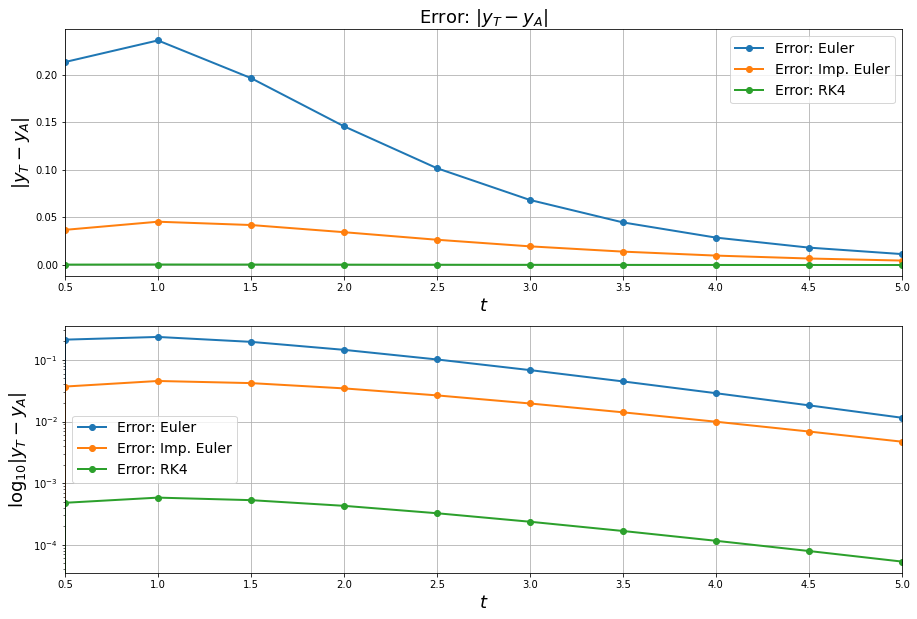

In [ ]:
# Plot the error
plt.figure(figsize=(15,10));
plt.subplot(211)
plt.plot(t, yEulerError, '.-', linewidth = 2, markersize = 12, label="Error: Euler");
plt.plot(t, yImpEulerError, '.-', linewidth = 2, markersize = 12, label = "Error: Imp. Euler");
plt.plot(t, yRK4Error, '.-', linewidth = 2, markersize = 12, label = "Error: RK4");

# Label Things
plt.xlabel(r'$t$', fontsize = 18);
plt.ylabel(r'$\vert y_{T} - y_{A}\vert$', fontsize = 18);
plt.title(r"Error: $\vert y_T - y_A\vert$", fontsize = 18);
plt.legend(fontsize=14)
plt.xlim([t[1],t[-1]])

plt.grid()

# Plot the Log  of the error
plt.subplot(212)
plt.semilogy(t, yEulerError, '.-', linewidth = 2, markersize = 12, label="Error: Euler");
plt.semilogy(t, yImpEulerError, '.-', linewidth = 2, markersize = 12, label = "Error: Imp. Euler");
plt.semilogy(t, yRK4Error, '.-', linewidth = 2, markersize = 12, label = "Error: RK4");

# Label Things
plt.xlabel(r'$t$', fontsize = 18);
plt.ylabel(r'$\log_{10}\left\vert y_{T} - y_{A}\right\vert$', fontsize = 18);
plt.legend(fontsize=14)
plt.xlim([t[1],t[-1]])

plt.grid()
plt.show()

## Lagniappe<a class="anchor" id="lagniappe"></a>
You know the drill, it's just a _little something extra_

### Testing Error as a function of $\Delta t$

Let's determine how the error changes when we compute the solution at $t = t_f = 5$ for this problem.  However, in order to compute this, we need to iterate each method for various value of $\Delta t$.  We will create a list of various $N$ values in the form $N = 2^4, 2^5, \ldots, 2^{11}$.  For each of these $N$ values, we can determine the corresponding $\Delta t$ value via $$\Delta t = \frac{t_f - t_0}{N}$$ 

For each different value of $\Delta t$, we will store the corresponding error of each method when compared to the value of the true solution at $t_f = 5$.  Finally, we will plot the error on a `loglog` plot.  If we compute the slope of each line, it will correspond to the local truncation error with each numerical method.

In [ ]:
numTestVals = 9;
errorOut = zeros([3,numTestVals]);
NOut = zeros([numTestVals]);
dtOut = zeros([numTestVals]);

for j in range(0,numTestVals):
  yEulerN = y0;
  yImpEulerN = y0;
  yRK4N = y0;
  tN = t0;
  N = 2**(j+4);
  NOut[j] = N;
  dt = (tf - t0)/N;
  dtOut[j] = dt;
  for n in range(1,N+1):
    # Euler Method
    yEulerN = yEulerN + dt*f(tN,yEulerN);
    # Improved Euler Method
    k1 = dt*f(tN,yImpEulerN);
    k2 = dt*f(tN+dt,yImpEulerN + k1);
    yImpEulerN = yImpEulerN + 1/2*(k1 + k2);
    # RK4
    k1 = dt*f(tN,yRK4N);
    k2 = dt*f(tN + dt/2,yRK4N + k1/2);
    k3 = dt*f(tN+dt/2, yRK4N + k2/2);
    k4 = dt*f(tN+dt,yRK4N + k3);
    yRK4N = yRK4N + 1/6*(k1 + 2*k2 + 2*k3 + k4);
    # update tN
    tN = tN + dt;

    errorOut[0,j] = abs(yTrue[-1]-yEulerN);
    errorOut[1,j] = abs(yTrue[-1]-yImpEulerN);
    errorOut[2,j] = abs(yTrue[-1]-yRK4N);


Now we will create a `loglog` plot of the error between the true and approximated solution at $t_f = 5$ given by $$\textsf{error} = |y_T(5) - y_A(5)|.$$  Thus, we plot $\log_{10}(\textsf{error})$ vs. $\log_{10}\Delta t$.  



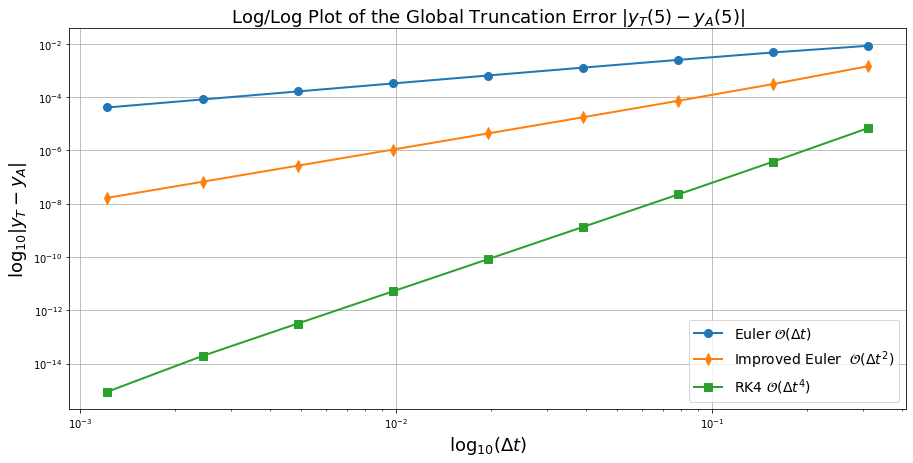

In [ ]:
plt.figure(figsize=(15,7));
plt.loglog(dtOut,errorOut[0,:],'o-',label=r"Euler $\mathcal{O}(\Delta t)$",linewidth=2,markersize=8)
plt.loglog(dtOut,errorOut[1,:],'d-',label="Improved Euler  $\mathcal{O}(\Delta t^2)$",linewidth=2,markersize=8)
plt.loglog(dtOut,errorOut[2,:],'s-',label="RK4 $\mathcal{O}(\Delta t^4)$",linewidth=2,markersize=8)
plt.legend(fontsize=14)

plt.xlabel("$\log_{10}(\Delta t)$", fontsize=18)
plt.ylabel(r"$\log_{10}\left\vert y_T - y_A\right\vert$",fontsize=18)
plt.title("Log/Log Plot of the Global Truncation Error $|y_T(5) - y_A(5)|$", fontsize=18)

plt.grid()
plt.show()